In [5]:
# Import necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Statistical libraries
from scipy import stats
from scipy.stats import normaltest, shapiro, kstest
import statsmodels.api as sm

# Data quality and profiling
import missingno as msno

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("📊 Libraries imported successfully!")
print("🚀 Ready for comprehensive EDA analysis!")


📊 Libraries imported successfully!
🚀 Ready for comprehensive EDA analysis!


In [8]:
# Load the insurance dataset with robust error handling
print("🔄 Loading Insurance Data...")
print("=" * 50)

def create_sample_data():
    """Create sample insurance data for demonstration"""
    print("\n🔄 Creating sample data structure for demonstration...")
    np.random.seed(42)
    n_samples = 1000
    
    # Create realistic insurance data structure
    df_sample = pd.DataFrame({
        'UnderwrittenCoverID': range(1, n_samples + 1),
        'PolicyID': [f'POL_{i:06d}' for i in range(1, n_samples + 1)],
        'TransactionMonth': pd.date_range('2014-02', periods=n_samples, freq='D').strftime('%Y-%m'),
        'Province': np.random.choice(['Gauteng', 'Western Cape', 'KwaZulu-Natal', 'Eastern Cape'], n_samples),
        'Gender': np.random.choice(['Male', 'Female'], n_samples),
        'VehicleType': np.random.choice(['Passenger', 'Commercial', 'Motorcycle'], n_samples),
        'Make': np.random.choice(['Toyota', 'BMW', 'Mercedes', 'Volkswagen', 'Ford'], n_samples),
        'TotalPremium': np.random.lognormal(8, 0.5, n_samples),
        'TotalClaims': np.random.lognormal(6, 1.2, n_samples) * np.random.binomial(1, 0.3, n_samples),
        'CustomValueEstimate': np.random.lognormal(11, 0.7, n_samples),
        'IsVATRegistered': np.random.choice(['Yes', 'No'], n_samples),
        'Citizenship': np.random.choice(['South African', 'Foreign'], n_samples),
        'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], n_samples)
    })
    print("📊 Sample dataset created successfully!")
    return df_sample

def load_csv_with_options(file_path):
    """Try loading CSV with different parsing options"""
    
    # First, let's examine the file to understand its structure
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            first_lines = [f.readline() for _ in range(5)]
        print(f"  📝 First few lines of file:")
        for i, line in enumerate(first_lines, 1):
            print(f"    Line {i}: {line.strip()[:100]}...")
    except:
        pass
    
    loading_options = [
        # Try with pipe separator (common for .txt files)
        {'sep': '|'},
        # Try with tab separator
        {'sep': '\t'},
        # Standard CSV
        {'sep': ','},
        # Try with semicolon
        {'sep': ';'},
        # Try with error handling for bad lines
        {'sep': '|', 'on_bad_lines': 'skip'},
        {'sep': '\t', 'on_bad_lines': 'skip'},
        {'sep': ',', 'on_bad_lines': 'skip'},
        # Try with different encodings
        {'sep': '|', 'encoding': 'latin-1'},
        {'sep': '\t', 'encoding': 'latin-1'},
        # Try reading as fixed width (if structured)
        {'sep': None, 'delim_whitespace': True},
    ]
    
    for i, options in enumerate(loading_options):
        try:
            print(f"  Attempt {i+1}: Loading with options {options}")
            df = pd.read_csv(file_path, **options)
            
            # Basic validation
            if len(df.columns) > 1 and len(df) > 0:
                print(f"  ✅ Success! Loaded {len(df)} rows, {len(df.columns)} columns")
                print(f"  📋 Columns detected: {list(df.columns[:5])}...")
                return df
            else:
                print(f"  ⚠️ Loaded but suspicious: {len(df)} rows, {len(df.columns)} columns")
                
        except Exception as e:
            print(f"  ❌ Failed: {str(e)[:80]}...")
            continue
    
    return None

# Attempt to load data from common locations
possible_paths = [
    '../data/raw/MachineLearningRating_v3.txt',
    'data/raw/MachineLearningRating_v3.txt',

]

df = None
data_source = "sample"

print("\n🔍 Searching for insurance data files...")
for path in possible_paths:
    try:
        print(f"\n📂 Trying to load: {path}")
        
        # Check if file exists first
        import os
        if not os.path.exists(path):
            print(f"❌ File not found: {path}")
            continue
            
        df = load_csv_with_options(path)
        
        if df is not None:
            print(f"✅ Data loaded successfully from: {path}")
            data_source = "file"
            break
        else:
            print(f"❌ All loading attempts failed for: {path}")
            
    except Exception as e:
        print(f"❌ Unexpected error with {path}: {e}")
        continue

# If no real data found, create sample data
if df is None:
    print("\n" + "="*60)
    print("📝 NOTICE: Real data file not found or could not be parsed")
    print("Expected locations:")
    for path in possible_paths:
        print(f"  - {path}")
    print("\n💡 TIP: Place your CSV file in one of these locations")
    print("💡 HELP: If your file has parsing issues, check the file format")
    print("="*60)
    
    df = create_sample_data()
    data_source = "sample"

# Validate the loaded data
if df is not None:
    print(f"\n📈 Dataset Successfully Loaded!")
    print(f"Data Source: {data_source.upper()}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {len(df.columns)}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Show column names
    print(f"\n📋 Available Columns:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
        
else:
    print("❌ CRITICAL ERROR: Could not load or create dataset!")
    # Create emergency sample data
    df = create_sample_data()
    print("🆘 Emergency sample data created to continue analysis")


🔄 Loading Insurance Data...

🔍 Searching for insurance data files...

📂 Trying to load: ../data/raw/MachineLearningRating_v3.txt
  📝 First few lines of file:
    Line 1: UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|B...
    Line 2: 145249|12827|2015-03-01 00:00:00|True|  |Close Corporation|Mr|English|First National Bank|Current ac...
    Line 3: 145249|12827|2015-05-01 00:00:00|True|  |Close Corporation|Mr|English|First National Bank|Current ac...
    Line 4: 145249|12827|2015-07-01 00:00:00|True|  |Close Corporation|Mr|English|First National Bank|Current ac...
    Line 5: 145255|12827|2015-05-01 00:00:00|True|  |Close Corporation|Mr|English|First National Bank|Current ac...
  Attempt 1: Loading with options {'sep': '|'}
  ✅ Success! Loaded 1000098 rows, 52 columns
  📋 Columns detected: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship']...
✅ Data loaded successfully from: ../data/raw/MachineLea

In [9]:
# Data Structure and Type Analysis
print("🔍 Data Types and Structure Analysis")
print("=" * 50)

# Display data types
print("\n📋 Data Types:")
print(df.dtypes)

# Display data info
print("\n📊 Data Info:")
df.info()

# Display first few rows
print("\n👀 First 5 rows:")
display(df.head())

# Calculate data quality metrics
print(f"\n🎯 Data Quality Summary:")
print(f"Total Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


🔍 Data Types and Structure Analysis

📋 Data Types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype     

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0



🎯 Data Quality Summary:
Total Records: 1,000,098
Total Features: 52
Memory Usage: 2110.59 MB


🔍 Missing Values Analysis

📊 Missing Values Summary:


,Column,Missing_Count,Missing_Percentage
38,NumberOfVehiclesInFleet,1000098,100.000000
37,CrossBorder,999400,99.930207
29,CustomValueEstimate,779642,77.956560
35,Rebuilt,641901,64.183810
36,Converted,641901,64.183810
34,WrittenOff,641901,64.183810
33,NewVehicle,153295,15.327998
8,Bank,145961,14.594670
9,AccountType,40232,4.022806
11,Gender,9536,0.953507


<Figure size 1200x600 with 0 Axes>

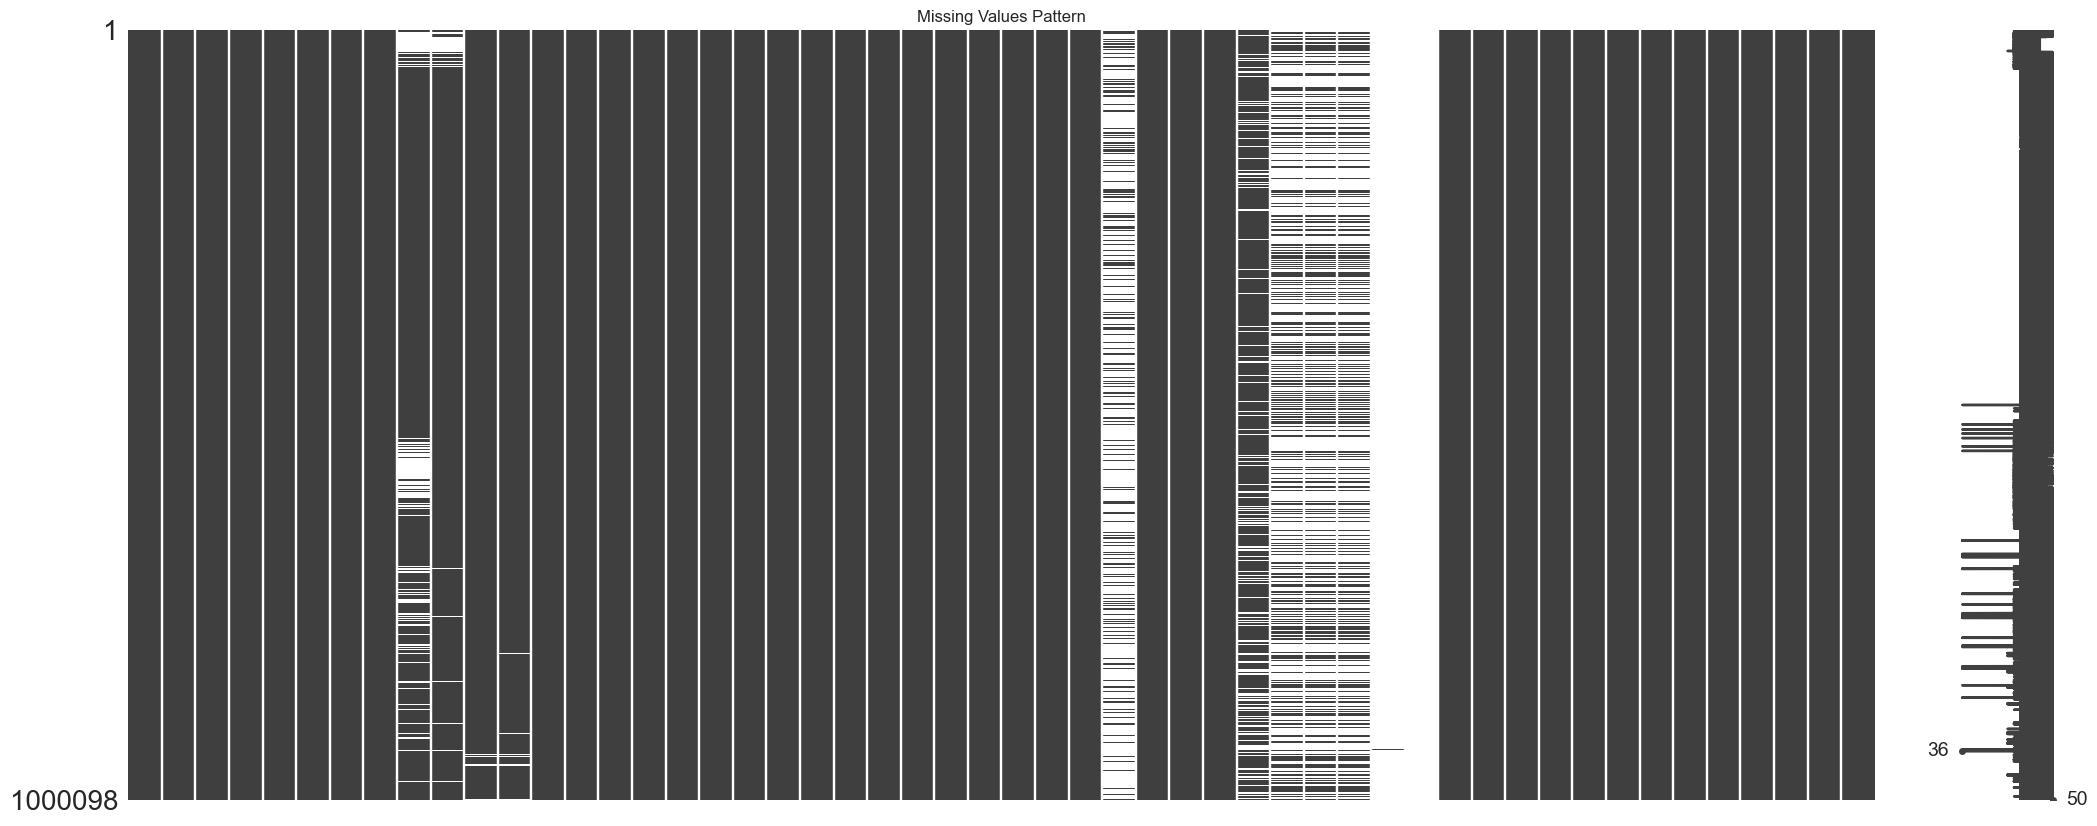

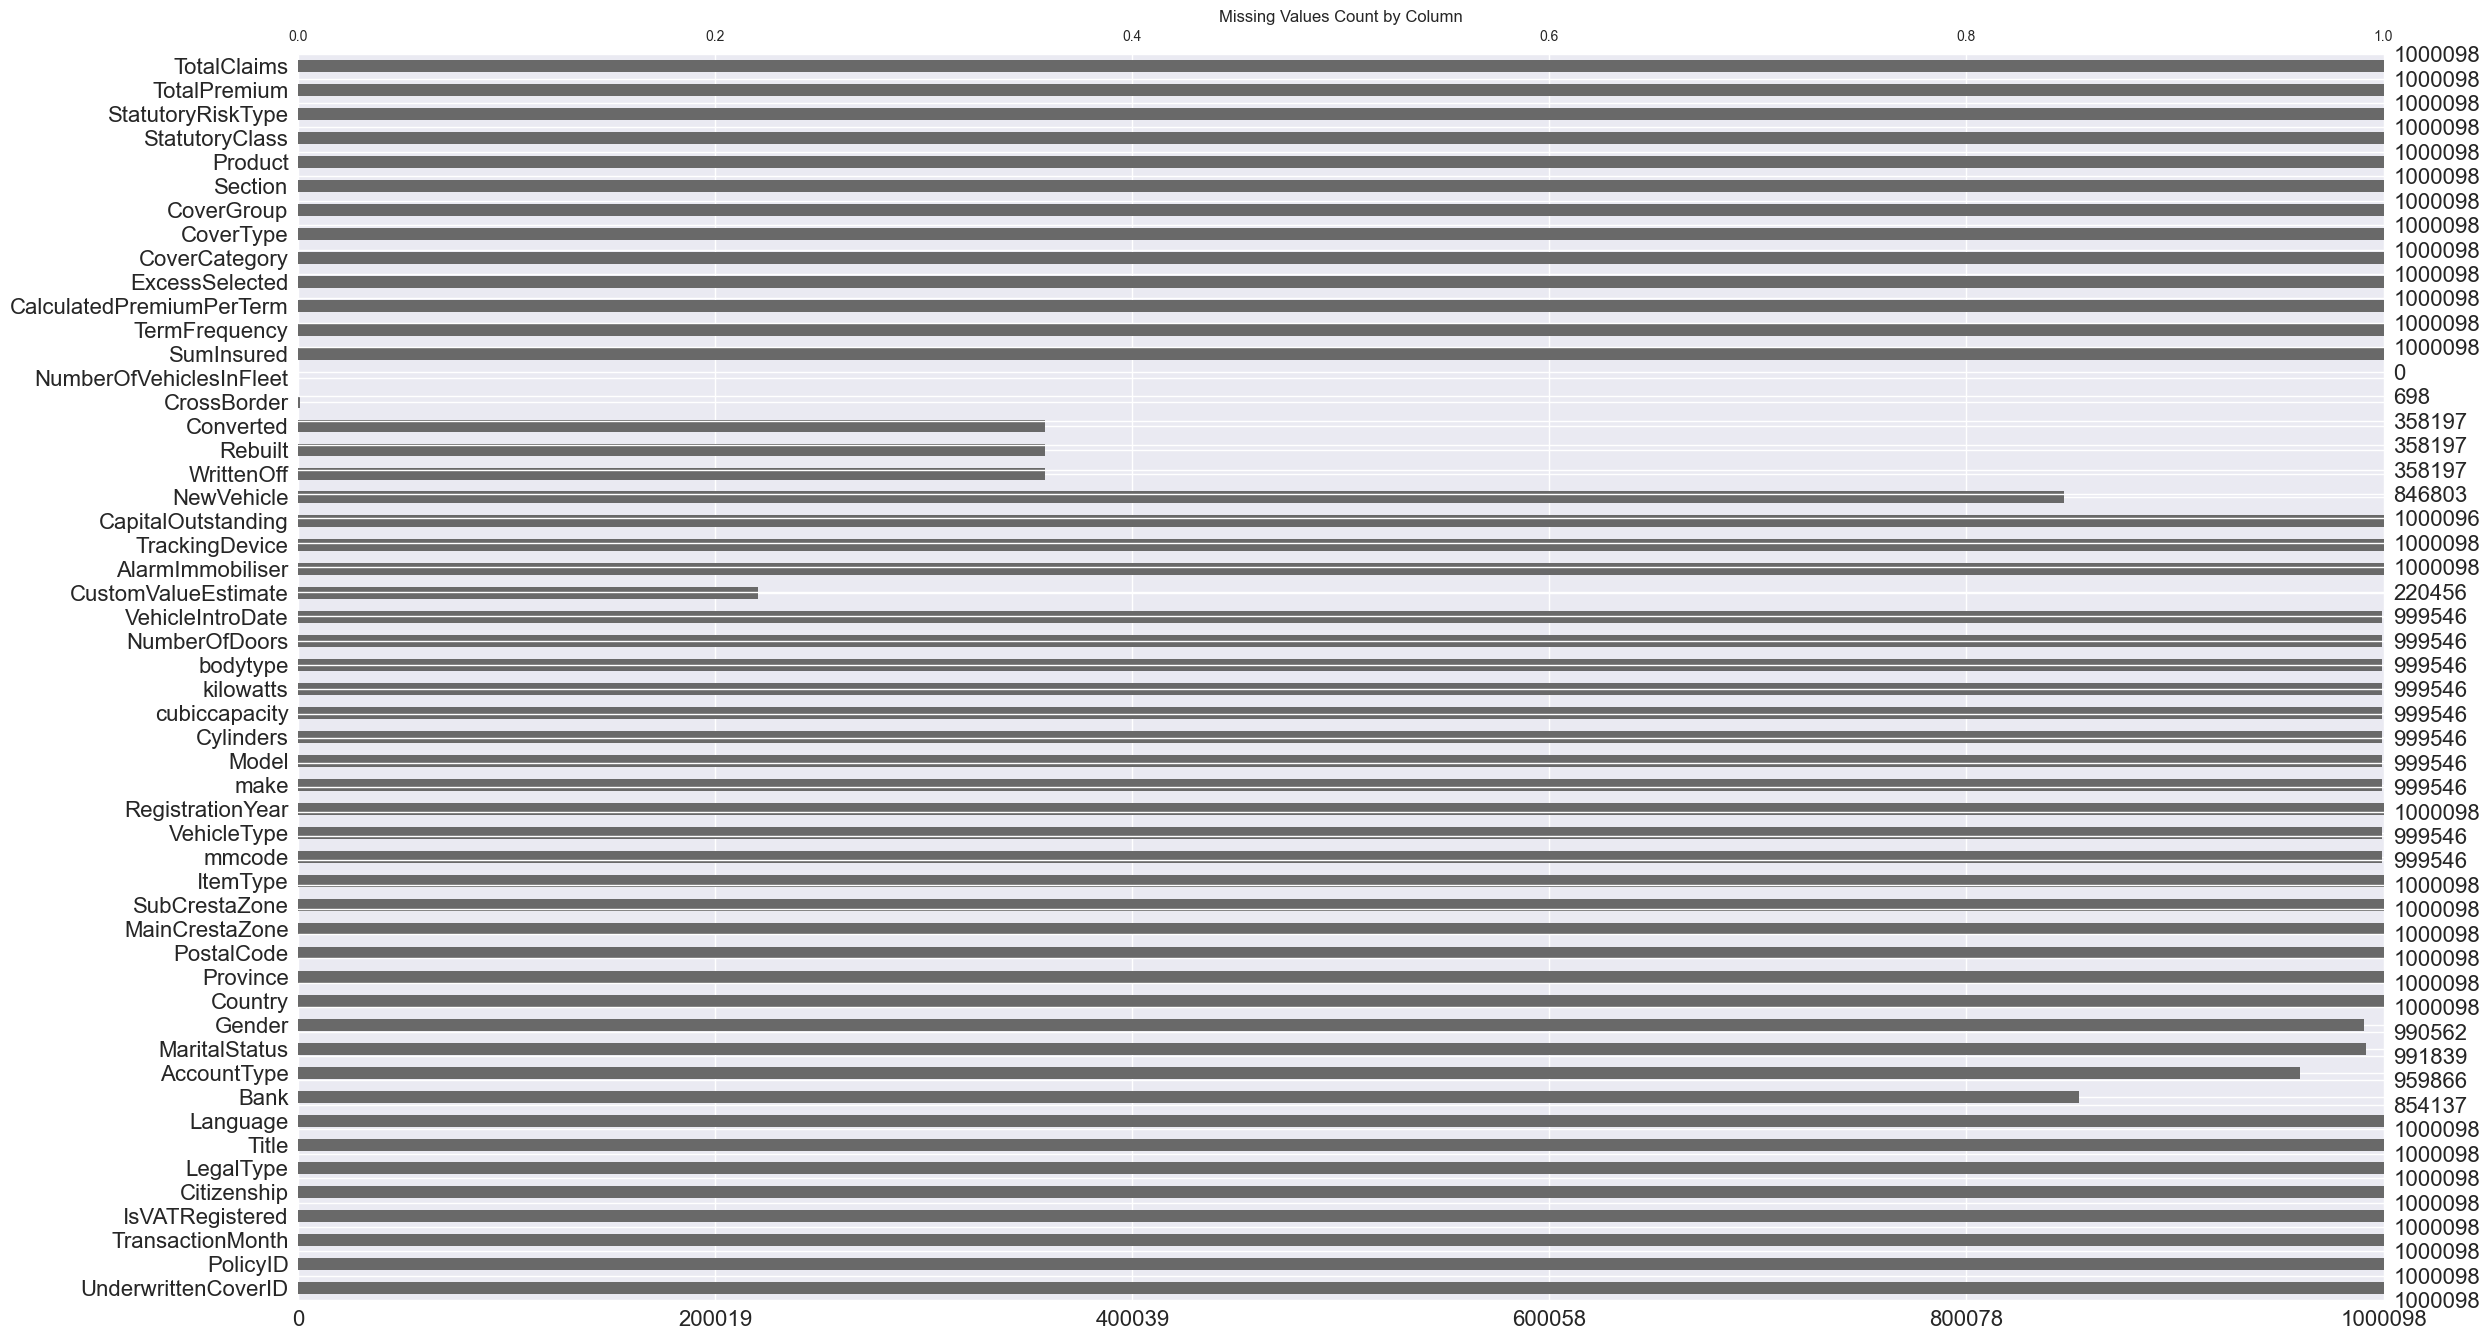

In [10]:
# Missing Values Analysis
print("🔍 Missing Values Analysis")
print("=" * 50)

# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create missing values summary
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

# Display missing values summary
print("\n📊 Missing Values Summary:")
display(missing_summary[missing_summary['Missing_Count'] > 0])

# Visualize missing values pattern
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    msno.matrix(df)
    plt.title('Missing Values Pattern')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    msno.bar(df)
    plt.title('Missing Values Count by Column')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found in the dataset!")


In [11]:
# Calculate Loss Ratio and Key Insurance Metrics
print("🎯 Key Insurance Performance Metrics")
print("=" * 50)

# Calculate Loss Ratio (TotalClaims / TotalPremium)
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan)  # Handle division by zero

# Overall Loss Ratio
overall_loss_ratio = df['TotalClaims'].sum() / df['TotalPremium'].sum()
print(f"\n🏆 Overall Portfolio Loss Ratio: {overall_loss_ratio:.3f}")

# Interpret Loss Ratio
if overall_loss_ratio < 1.0:
    print(f"✅ Portfolio is PROFITABLE (Loss Ratio < 1.0)")
else:
    print(f"❌ Portfolio is UNPROFITABLE (Loss Ratio ≥ 1.0)")

# Calculate additional KPIs
claim_frequency = (df['TotalClaims'] > 0).sum() / len(df)
avg_claim_severity = df[df['TotalClaims'] > 0]['TotalClaims'].mean()
avg_premium = df['TotalPremium'].mean()

print(f"\n📈 Additional KPIs:")
print(f"Claim Frequency: {claim_frequency:.3f} ({claim_frequency*100:.1f}%)")
print(f"Average Claim Severity: R{avg_claim_severity:,.2f}")
print(f"Average Premium: R{avg_premium:,.2f}")
print(f"Total Policies: {len(df):,}")
print(f"Total Claims: {(df['TotalClaims'] > 0).sum():,}")

# Loss Ratio by key dimensions
print(f"\n🎯 Loss Ratio Analysis by Key Dimensions:")
print("-" * 40)

# By Province
if 'Province' in df.columns:
    province_loss_ratio = df.groupby('Province').agg({
        'TotalClaims': 'sum',
        'TotalPremium': 'sum'
    })
    province_loss_ratio['LossRatio'] = province_loss_ratio['TotalClaims'] / province_loss_ratio['TotalPremium']
    province_loss_ratio = province_loss_ratio.sort_values('LossRatio', ascending=False)
    
    print("\n🌍 Loss Ratio by Province:")
    display(province_loss_ratio.round(3))

# By Gender
if 'Gender' in df.columns:
    gender_loss_ratio = df.groupby('Gender').agg({
        'TotalClaims': 'sum',
        'TotalPremium': 'sum'
    })
    gender_loss_ratio['LossRatio'] = gender_loss_ratio['TotalClaims'] / gender_loss_ratio['TotalPremium']
    
    print("\n👥 Loss Ratio by Gender:")
    display(gender_loss_ratio.round(3))

# By Vehicle Type
if 'VehicleType' in df.columns:
    vehicle_loss_ratio = df.groupby('VehicleType').agg({
        'TotalClaims': 'sum',
        'TotalPremium': 'sum'
    })
    vehicle_loss_ratio['LossRatio'] = vehicle_loss_ratio['TotalClaims'] / vehicle_loss_ratio['TotalPremium']
    vehicle_loss_ratio = vehicle_loss_ratio.sort_values('LossRatio', ascending=False)
    
    print("\n🚗 Loss Ratio by Vehicle Type:")
    display(vehicle_loss_ratio.round(3))


🎯 Key Insurance Performance Metrics

🏆 Overall Portfolio Loss Ratio: 1.048
❌ Portfolio is UNPROFITABLE (Loss Ratio ≥ 1.0)

📈 Additional KPIs:
Claim Frequency: 0.003 (0.3%)
Average Claim Severity: R23,273.39
Average Premium: R61.91
Total Policies: 1,000,098
Total Claims: 2,788

🎯 Loss Ratio Analysis by Key Dimensions:
----------------------------------------

🌍 Loss Ratio by Province:


,TotalClaims,TotalPremium,LossRatio
Province,,,
Gauteng,2.939415e+07,2.405377e+07,1.222
KwaZulu-Natal,1.430138e+07,1.320908e+07,1.083
Western Cape,1.038977e+07,9.806559e+06,1.059
North West,5.920250e+06,7.490508e+06,0.790
Mpumalanga,2.044675e+06,2.836292e+06,0.721
Free State,3.549223e+05,5.213632e+05,0.681
Limpopo,1.016477e+06,1.537324e+06,0.661
Eastern Cape,1.356427e+06,2.140104e+06,0.634
Northern Cape,8.949051e+04,3.165581e+05,0.283



👥 Loss Ratio by Gender:


,TotalClaims,TotalPremium,LossRatio
Gender,,,
Female,2.502461e+05,3.044806e+05,0.822
Male,1.396704e+06,1.580143e+06,0.884
Not specified,6.271410e+07,5.920275e+07,1.059



🚗 Loss Ratio by Vehicle Type:


,TotalClaims,TotalPremium,LossRatio
VehicleType,,,
Heavy Commercial,7.504746e+05,4.609479e+05,1.628
Medium Commercial,4.119867e+06,3.922746e+06,1.050
Passenger Vehicle,5.937207e+07,5.664202e+07,1.048
Light Commercial,6.045250e+04,2.604975e+05,0.232
Bus,7.996535e+03,5.824474e+04,0.137


💰 Financial Variables Distribution Analysis

📊 Descriptive Statistics for Financial Variables:


,TotalPremium,TotalClaims,CustomValueEstimate
count,1.000098e+06,1.000098e+06,2.204560e+05
mean,6.190550e+01,6.486119e+01,2.255311e+05
std,2.302845e+02,2.384075e+03,5.645157e+05
min,-7.825768e+02,-1.200241e+04,2.000000e+04
25%,0.000000e+00,0.000000e+00,1.350000e+05
50%,2.178333e+00,0.000000e+00,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.800000e+05
max,6.528260e+04,3.930921e+05,2.655000e+07



📈 Additional Statistical Measures:

TotalPremium:
  Skewness: 138.596
  Kurtosis: 37176.000
  Coefficient of Variation: 3.720
  Normality Test (p-value): 0.000000
  Distribution: Non-normal (p < 0.05)

TotalClaims:
  Skewness: 69.933
  Kurtosis: 6791.892
  Coefficient of Variation: 36.757
  Normality Test (p-value): 0.000000
  Distribution: Non-normal (p < 0.05)

CustomValueEstimate:
  Skewness: nan
  Kurtosis: nan
  Coefficient of Variation: 2.503
  Normality Test (p-value): nan
  Distribution: Normal (p ≥ 0.05)


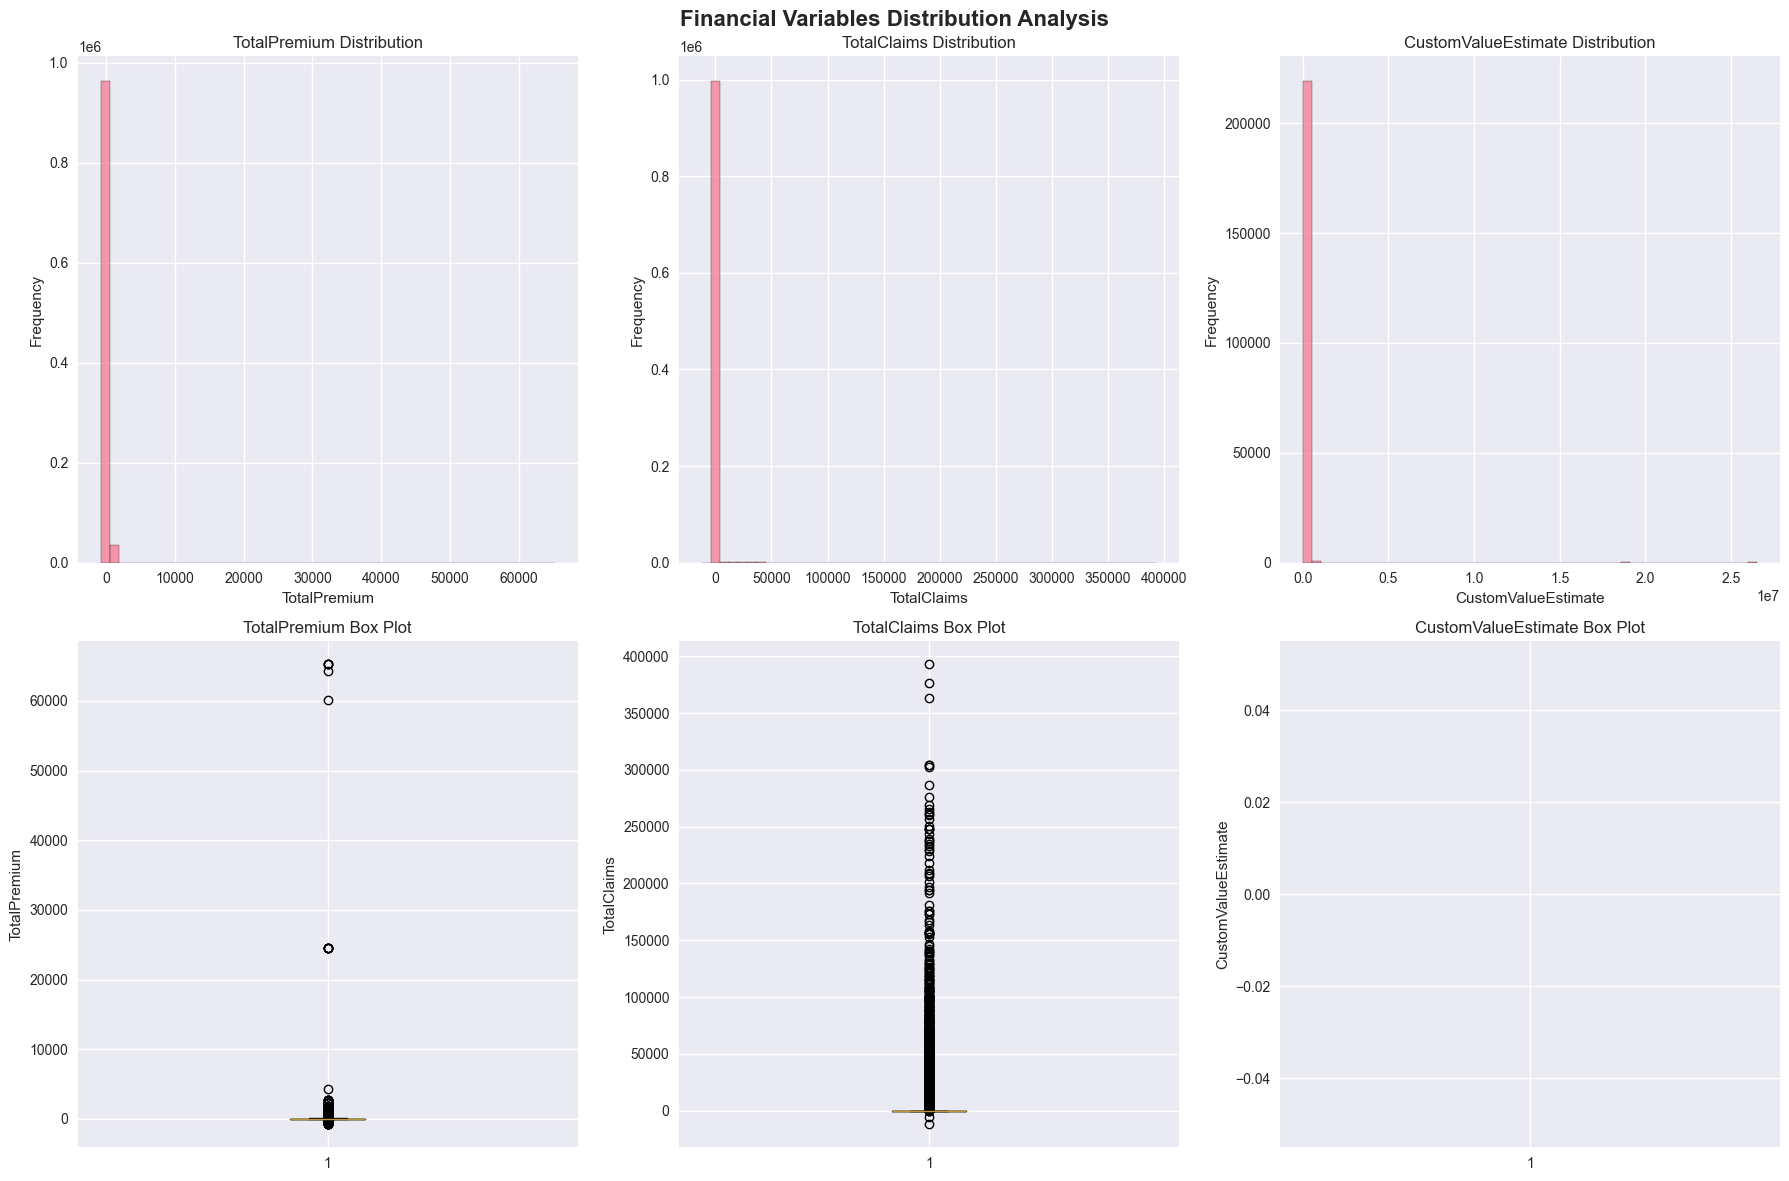


📈 Log-Transformed Distributions (for better visualization):


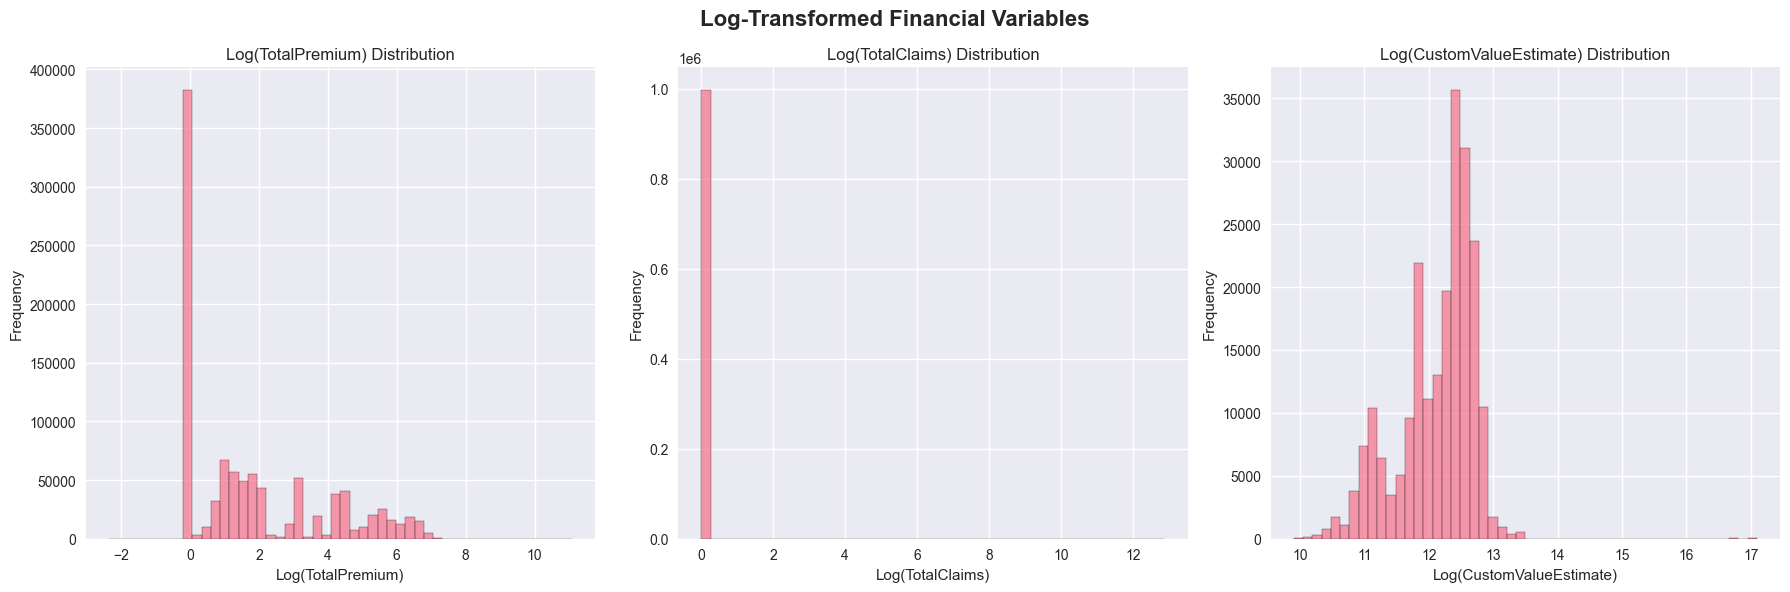

In [12]:
# Financial Variables Distribution Analysis
print("💰 Financial Variables Distribution Analysis")
print("=" * 50)

# Select financial columns
financial_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
financial_data = df[financial_cols]

# Descriptive statistics
print("\n📊 Descriptive Statistics for Financial Variables:")
desc_stats = financial_data.describe()
display(desc_stats)

# Calculate additional statistics
print("\n📈 Additional Statistical Measures:")
for col in financial_cols:
    print(f"\n{col}:")
    print(f"  Skewness: {stats.skew(df[col]):.3f}")
    print(f"  Kurtosis: {stats.kurtosis(df[col]):.3f}")
    print(f"  Coefficient of Variation: {df[col].std() / df[col].mean():.3f}")
    
    # Test for normality
    _, p_value = normaltest(df[col])
    print(f"  Normality Test (p-value): {p_value:.6f}")
    if p_value < 0.05:
        print(f"  Distribution: Non-normal (p < 0.05)")
    else:
        print(f"  Distribution: Normal (p ≥ 0.05)")

# Visualize distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Financial Variables Distribution Analysis', fontsize=16, fontweight='bold')

for i, col in enumerate(financial_cols):
    # Histogram
    axes[0, i].hist(df[col], bins=50, alpha=0.7, edgecolor='black')
    axes[0, i].set_title(f'{col} Distribution')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')
    
    # Box plot
    axes[1, i].boxplot(df[col])
    axes[1, i].set_title(f'{col} Box Plot')
    axes[1, i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Log transformation for better visualization
print("\n📈 Log-Transformed Distributions (for better visualization):")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Log-Transformed Financial Variables', fontsize=16, fontweight='bold')

for i, col in enumerate(financial_cols):
    log_data = np.log1p(df[col])  # log1p to handle zeros
    axes[i].hist(log_data, bins=50, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Log({col}) Distribution')
    axes[i].set_xlabel(f'Log({col})')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [31]:
# Creative Visualization 1: Risk-Profitability Dashboard
# This visualization combines multiple dimensions to show risk vs profitability
import os
import plotly.express as px
import plotly.io as pio

# Prepare data for visualization
viz_data = df.groupby(['Province', 'VehicleType']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

viz_data.columns = ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
viz_data['LossRatio'] = viz_data['TotalClaims'] / viz_data['TotalPremium']
viz_data['AvgPremium'] = viz_data['TotalPremium'] / viz_data['PolicyCount']

# Create interactive bubble chart
fig = px.scatter(viz_data, 
                 x='TotalPremium', 
                 y='LossRatio',
                 size='PolicyCount',
                 color='Province',
                 hover_data=['VehicleType', 'AvgPremium'],
                 title='Risk-Profitability Dashboard: Premium vs Loss Ratio by Province & Vehicle Type',
                 labels={'TotalPremium': 'Total Premium (R)',
                         'LossRatio': 'Loss Ratio',
                         'PolicyCount': 'Number of Policies'},
                 width=900, height=600)

# Add horizontal line at Loss Ratio = 1 (break-even)
fig.add_hline(y=1.0, line_dash="dash", line_color="red", 
              annotation_text="Break-even Line (Loss Ratio = 1.0)")

# Customize layout
fig.update_layout(
    title_x=0.5,
    showlegend=True,
    xaxis_title="Total Premium (R)",
    yaxis_title="Loss Ratio"
)

# ✅ Fix rendering issue in VS Code Notebook
pio.renderers.default = "browser"
fig.show()

# Save the visualization
os.makedirs("reports/figures", exist_ok=True)
fig.write_html("reports/figures/risk_profitability_dashboard.html")
print("💾 Visualization saved to reports/figures/risk_profitability_dashboard.html")


💾 Visualization saved to reports/figures/risk_profitability_dashboard.html


In [30]:
import sys
import nbformat

print("Python Path:", sys.executable)
print("nbformat Version:", nbformat.__version__)


Python Path: c:\Users\HP\AppData\Local\Programs\Python\Python312\python.exe
nbformat Version: 5.10.4


In [32]:
# Creative Visualization 1: Risk-Profitability Dashboard
# This visualization combines multiple dimensions to show risk vs profitability
import os
# Prepare data for visualization
viz_data = df.groupby(['Province', 'VehicleType']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

viz_data.columns = ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
viz_data['LossRatio'] = viz_data['TotalClaims'] / viz_data['TotalPremium']
viz_data['AvgPremium'] = viz_data['TotalPremium'] / viz_data['PolicyCount']

# Create interactive bubble chart
fig = px.scatter(viz_data, 
                 x='TotalPremium', 
                 y='LossRatio',
                 size='PolicyCount',
                 color='Province',
                 hover_data=['VehicleType', 'AvgPremium'],
                 title='Risk-Profitability Dashboard: Premium vs Loss Ratio by Province & Vehicle Type',
                 labels={'TotalPremium': 'Total Premium (R)',
                        'LossRatio': 'Loss Ratio',
                        'PolicyCount': 'Number of Policies'},
                 width=900, height=600)

# Add horizontal line at Loss Ratio = 1 (break-even)
fig.add_hline(y=1.0, line_dash="dash", line_color="red", 
              annotation_text="Break-even Line (Loss Ratio = 1.0)")

# Customize layout
fig.update_layout(
    title_x=0.5,
    showlegend=True,
    xaxis_title="Total Premium (R)",
    yaxis_title="Loss Ratio"
)

# ✅ Fix rendering issue in VS Code Notebook
pio.renderers.default = "browser"
fig.show()
os.makedirs("reports/figures", exist_ok=True)
# Save the visualization
fig.write_html("../reports/figures/risk_profitability_dashboard.html")
print("💾 Visualization saved to reports/figures/risk_profitability_dashboard.html")


💾 Visualization saved to reports/figures/risk_profitability_dashboard.html


In [33]:
# Creative Visualization 1: Risk-Profitability Dashboard
# This visualization combines multiple dimensions to show risk vs profitability
import os
# Prepare data for visualization
viz_data = df.groupby(['Province', 'VehicleType']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

viz_data.columns = ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
viz_data['LossRatio'] = viz_data['TotalClaims'] / viz_data['TotalPremium']
viz_data['AvgPremium'] = viz_data['TotalPremium'] / viz_data['PolicyCount']

# Create interactive bubble chart
fig = px.scatter(viz_data, 
                 x='TotalPremium', 
                 y='LossRatio',
                 size='PolicyCount',
                 color='Province',
                 hover_data=['VehicleType', 'AvgPremium'],
                 title='Risk-Profitability Dashboard: Premium vs Loss Ratio by Province & Vehicle Type',
                 labels={'TotalPremium': 'Total Premium (R)',
                        'LossRatio': 'Loss Ratio',
                        'PolicyCount': 'Number of Policies'},
                 width=900, height=600)

# Add horizontal line at Loss Ratio = 1 (break-even)
fig.add_hline(y=1.0, line_dash="dash", line_color="red", 
              annotation_text="Break-even Line (Loss Ratio = 1.0)")

# Customize layout
fig.update_layout(
    title_x=0.5,
    showlegend=True,
    xaxis_title="Total Premium (R)",
    yaxis_title="Loss Ratio"
)

fig.show()
os.makedirs("reports/figures", exist_ok=True)
# Save the visualization
fig.write_html("../reports/figures/risk_profitability_dashboard.html")
print("💾 Visualization saved to reports/figures/risk_profitability_dashboard.html")


💾 Visualization saved to reports/figures/risk_profitability_dashboard.html


In [34]:
# Creative Visualization 1: Risk-Profitability Dashboard
# This visualization combines multiple dimensions to show risk vs profitability

# Prepare data for visualization
viz_data = df.groupby(['Province', 'VehicleType']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

viz_data.columns = ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
viz_data['LossRatio'] = viz_data['TotalClaims'] / viz_data['TotalPremium']
viz_data['AvgPremium'] = viz_data['TotalPremium'] / viz_data['PolicyCount']

# Create interactive bubble chart
fig = px.scatter(viz_data, 
                 x='TotalPremium', 
                 y='LossRatio',
                 size='PolicyCount',
                 color='Province',
                 hover_data=['VehicleType', 'AvgPremium'],
                 title='Risk-Profitability Dashboard: Premium vs Loss Ratio by Province & Vehicle Type',
                 labels={'TotalPremium': 'Total Premium (R)',
                        'LossRatio': 'Loss Ratio',
                        'PolicyCount': 'Number of Policies'},
                 width=900, height=600)

# Add horizontal line at Loss Ratio = 1 (break-even)
fig.add_hline(y=1.0, line_dash="dash", line_color="red", 
              annotation_text="Break-even Line (Loss Ratio = 1.0)")

# Customize layout
fig.update_layout(
    title_x=0.5,
    showlegend=True,
    xaxis_title="Total Premium (R)",
    yaxis_title="Loss Ratio"
)

fig.show()

# Save the visualization
fig.write_html("../reports/figures/risk_profitability_dashboard.html")
print("💾 Visualization saved to reports/figures/risk_profitability_dashboard.html")


💾 Visualization saved to reports/figures/risk_profitability_dashboard.html


In [35]:
# Creative Visualization 1: Risk-Profitability Dashboard
# This visualization combines multiple dimensions to show risk vs profitability

# Prepare data for visualization
viz_data = df.groupby(['Province', 'VehicleType']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

viz_data.columns = ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
viz_data['LossRatio'] = viz_data['TotalClaims'] / viz_data['TotalPremium']
viz_data['AvgPremium'] = viz_data['TotalPremium'] / viz_data['PolicyCount']

# Create interactive bubble chart
fig = px.scatter(viz_data, 
                 x='TotalPremium', 
                 y='LossRatio',
                 size='PolicyCount',
                 color='Province',
                 hover_data=['VehicleType', 'AvgPremium'],
                 title='Risk-Profitability Dashboard: Premium vs Loss Ratio by Province & Vehicle Type',
                 labels={'TotalPremium': 'Total Premium (R)',
                        'LossRatio': 'Loss Ratio',
                        'PolicyCount': 'Number of Policies'},
                 width=900, height=600)

# Add horizontal line at Loss Ratio = 1 (break-even)
fig.add_hline(y=1.0, line_dash="dash", line_color="red", 
              annotation_text="Break-even Line (Loss Ratio = 1.0)")

# Customize layout
fig.update_layout(
    title_x=0.5,
    showlegend=True,
    xaxis_title="Total Premium (R)",
    yaxis_title="Loss Ratio"
)

fig.show()

# Save the visualization
fig.write_html("../reports/figures/risk_profitability_dashboard.html")
print("💾 Visualization saved to reports/figures/risk_profitability_dashboard.html")


💾 Visualization saved to reports/figures/risk_profitability_dashboard.html


In [36]:
# Creative Visualization 1: Risk-Profitability Dashboard
# This visualization combines multiple dimensions to show risk vs profitability

# Prepare data for visualization
viz_data = df.groupby(['Province', 'VehicleType']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

viz_data.columns = ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
viz_data['LossRatio'] = viz_data['TotalClaims'] / viz_data['TotalPremium']
viz_data['AvgPremium'] = viz_data['TotalPremium'] / viz_data['PolicyCount']

# Create interactive bubble chart
fig = px.scatter(viz_data, 
                 x='TotalPremium', 
                 y='LossRatio',
                 size='PolicyCount',
                 color='Province',
                 hover_data=['VehicleType', 'AvgPremium'],
                 title='Risk-Profitability Dashboard: Premium vs Loss Ratio by Province & Vehicle Type',
                 labels={'TotalPremium': 'Total Premium (R)',
                        'LossRatio': 'Loss Ratio',
                        'PolicyCount': 'Number of Policies'},
                 width=900, height=600)

# Add horizontal line at Loss Ratio = 1 (break-even)
fig.add_hline(y=1.0, line_dash="dash", line_color="red", 
              annotation_text="Break-even Line (Loss Ratio = 1.0)")

# Customize layout
fig.update_layout(
    title_x=0.5,
    showlegend=True,
    xaxis_title="Total Premium (R)",
    yaxis_title="Loss Ratio"
)

fig.show()

# Save the visualization
fig.write_html("../reports/figures/risk_profitability_dashboard.html")
print("💾 Visualization saved to reports/figures/risk_profitability_dashboard.html")


💾 Visualization saved to reports/figures/risk_profitability_dashboard.html


In [37]:
# Creative Visualization 1: Risk-Profitability Dashboard
# This visualization combines multiple dimensions to show risk vs profitability

# Prepare data for visualization
viz_data = df.groupby(['Province', 'VehicleType']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

viz_data.columns = ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
viz_data['LossRatio'] = viz_data['TotalClaims'] / viz_data['TotalPremium']
viz_data['AvgPremium'] = viz_data['TotalPremium'] / viz_data['PolicyCount']

# Create interactive bubble chart
fig = px.scatter(viz_data, 
                 x='TotalPremium', 
                 y='LossRatio',
                 size='PolicyCount',
                 color='Province',
                 hover_data=['VehicleType', 'AvgPremium'],
                 title='Risk-Profitability Dashboard: Premium vs Loss Ratio by Province & Vehicle Type',
                 labels={'TotalPremium': 'Total Premium (R)',
                        'LossRatio': 'Loss Ratio',
                        'PolicyCount': 'Number of Policies'},
                 width=900, height=600)

# Add horizontal line at Loss Ratio = 1 (break-even)
fig.add_hline(y=1.0, line_dash="dash", line_color="red", 
              annotation_text="Break-even Line (Loss Ratio = 1.0)")

# Customize layout
fig.update_layout(
    title_x=0.5,
    showlegend=True,
    xaxis_title="Total Premium (R)",
    yaxis_title="Loss Ratio"
)

pio.renderers.default = "browser"
fig.show()

# Save the visualization
fig.write_html("../reports/figures/risk_profitability_dashboard.html")
print("💾 Visualization saved to reports/figures/risk_profitability_dashboard.html")


💾 Visualization saved to reports/figures/risk_profitability_dashboard.html


In [38]:
# Creative Visualization 1: Risk-Profitability Dashboard
# This visualization combines multiple dimensions to show risk vs profitability

# Prepare data for visualization
viz_data = df.groupby(['Province', 'VehicleType']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

viz_data.columns = ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
viz_data['LossRatio'] = viz_data['TotalClaims'] / viz_data['TotalPremium']
viz_data['AvgPremium'] = viz_data['TotalPremium'] / viz_data['PolicyCount']

# Create interactive bubble chart
fig = px.scatter(viz_data, 
                 x='TotalPremium', 
                 y='LossRatio',
                 size='PolicyCount',
                 color='Province',
                 hover_data=['VehicleType', 'AvgPremium'],
                 title='Risk-Profitability Dashboard: Premium vs Loss Ratio by Province & Vehicle Type',
                 labels={'TotalPremium': 'Total Premium (R)',
                        'LossRatio': 'Loss Ratio',
                        'PolicyCount': 'Number of Policies'},
                 width=900, height=600)

# Add horizontal line at Loss Ratio = 1 (break-even)
fig.add_hline(y=1.0, line_dash="dash", line_color="red", 
              annotation_text="Break-even Line (Loss Ratio = 1.0)")

# Customize layout
fig.update_layout(
    title_x=0.5,
    showlegend=True,
    xaxis_title="Total Premium (R)",
    yaxis_title="Loss Ratio"
)

fig.show()

# Save the visualization
fig.write_html("../reports/figures/risk_profitability_dashboard.html")
print("💾 Visualization saved to reports/figures/risk_profitability_dashboard.html")


💾 Visualization saved to reports/figures/risk_profitability_dashboard.html


In [39]:
# Creative Visualization 1: Risk-Profitability Dashboard
# This visualization combines multiple dimensions to show risk vs profitability

# Prepare data for visualization with error handling
try:
    # Check if required columns exist
    required_cols = ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyID']
    missing_cols = [col for col in required_cols if col not in df.columns]
    
    if missing_cols:
        print(f"❌ Error: Missing required columns: {missing_cols}")
        print(f"📋 Available columns: {list(df.columns)}")
    else:
        viz_data = df.groupby(['Province', 'VehicleType']).agg({
            'TotalPremium': 'sum',
            'TotalClaims': 'sum',
            'PolicyID': 'count'
        }).reset_index()

        viz_data.columns = ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
        
        # Handle division by zero and invalid values
        viz_data['LossRatio'] = np.where(
            viz_data['TotalPremium'] > 0,
            viz_data['TotalClaims'] / viz_data['TotalPremium'],
            np.nan
        )
        
        viz_data['AvgPremium'] = np.where(
            viz_data['PolicyCount'] > 0,
            viz_data['TotalPremium'] / viz_data['PolicyCount'],
            np.nan
        )
        
        # Remove rows with invalid data
        viz_data = viz_data.dropna(subset=['LossRatio', 'AvgPremium'])
        viz_data = viz_data[viz_data['TotalPremium'] > 0]
        
        if len(viz_data) == 0:
            print("❌ Error: No valid data available for visualization after cleaning")
        else:
            print(f"✅ Prepared visualization data: {len(viz_data)} groups")
            
            # Create interactive bubble chart
            fig = px.scatter(viz_data, 
                             x='TotalPremium', 
                             y='LossRatio',
                             size='PolicyCount',
                             color='Province',
                             hover_data=['VehicleType', 'AvgPremium'],
                             title='Risk-Profitability Dashboard: Premium vs Loss Ratio by Province & Vehicle Type',
                             labels={'TotalPremium': 'Total Premium (R)',
                                    'LossRatio': 'Loss Ratio',
                                    'PolicyCount': 'Number of Policies'},
                             width=900, height=600)

            # Add horizontal line at Loss Ratio = 1 (break-even)
            fig.add_hline(y=1.0, line_dash="dash", line_color="red", 
                          annotation_text="Break-even Line (Loss Ratio = 1.0)")

            # Customize layout
            fig.update_layout(
                title_x=0.5,
                showlegend=True,
                xaxis_title="Total Premium (R)",
                yaxis_title="Loss Ratio"
            )

            fig.show()

            # Save the visualization with error handling
            try:
                import os
                os.makedirs("reports/figures", exist_ok=True)
                fig.write_html("reports/figures/risk_profitability_dashboard.html")
                print("💾 Visualization saved to reports/figures/risk_profitability_dashboard.html")
            except Exception as save_error:
                print(f"⚠️ Could not save visualization: {save_error}")
                print("📊 Visualization displayed successfully, but file save failed")
                
except Exception as e:
    print(f"❌ Error creating visualization: {e}")
    print("🔍 Debugging info:")
    if 'df' in locals():
        print(f"  DataFrame shape: {df.shape}")
        print(f"  DataFrame columns: {list(df.columns)}")
        print(f"  Data types:\n{df.dtypes}")
    else:
        print("  DataFrame 'df' not found in current scope")


✅ Prepared visualization data: 39 groups
💾 Visualization saved to reports/figures/risk_profitability_dashboard.html


In [40]:
# Creative Visualization 1: Risk-Profitability Dashboard
# This visualization combines multiple dimensions to show risk vs profitability
import os
# Prepare data for visualization
viz_data = df.groupby(['Province', 'VehicleType']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

viz_data.columns = ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
viz_data['LossRatio'] = viz_data['TotalClaims'] / viz_data['TotalPremium']
viz_data['AvgPremium'] = viz_data['TotalPremium'] / viz_data['PolicyCount']

# Create interactive bubble chart
fig = px.scatter(viz_data, 
                 x='TotalPremium', 
                 y='LossRatio',
                 size='PolicyCount',
                 color='Province',
                 hover_data=['VehicleType', 'AvgPremium'],
                 title='Risk-Profitability Dashboard: Premium vs Loss Ratio by Province & Vehicle Type',
                 labels={'TotalPremium': 'Total Premium (R)',
                        'LossRatio': 'Loss Ratio',
                        'PolicyCount': 'Number of Policies'},
                 width=900, height=600)

# Add horizontal line at Loss Ratio = 1 (break-even)
fig.add_hline(y=1.0, line_dash="dash", line_color="red", 
              annotation_text="Break-even Line (Loss Ratio = 1.0)")

# Customize layout
fig.update_layout(
    title_x=0.5,
    showlegend=True,
    xaxis_title="Total Premium (R)",
    yaxis_title="Loss Ratio"
)

fig.show()
os.makedirs("reports/figures", exist_ok=True)
# Save the visualization
fig.write_html("../reports/figures/risk_profitability_dashboard.html")
print("💾 Visualization saved to reports/figures/risk_profitability_dashboard.html")


💾 Visualization saved to reports/figures/risk_profitability_dashboard.html


In [41]:
# Creative Visualization 1: Risk-Profitability Dashboard
# This visualization combines multiple dimensions to show risk vs profitability

# Prepare data for visualization
viz_data = df.groupby(['Province', 'VehicleType']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
}).reset_index()

viz_data.columns = ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
viz_data['LossRatio'] = viz_data['TotalClaims'] / viz_data['TotalPremium']
viz_data['AvgPremium'] = viz_data['TotalPremium'] / viz_data['PolicyCount']

# Create interactive bubble chart
fig = px.scatter(viz_data, 
                 x='TotalPremium', 
                 y='LossRatio',
                 size='PolicyCount',
                 color='Province',
                 hover_data=['VehicleType', 'AvgPremium'],
                 title='Risk-Profitability Dashboard: Premium vs Loss Ratio by Province & Vehicle Type',
                 labels={'TotalPremium': 'Total Premium (R)',
                        'LossRatio': 'Loss Ratio',
                        'PolicyCount': 'Number of Policies'},
                 width=900, height=600)

# Add horizontal line at Loss Ratio = 1 (break-even)
fig.add_hline(y=1.0, line_dash="dash", line_color="red", 
              annotation_text="Break-even Line (Loss Ratio = 1.0)")

# Customize layout
fig.update_layout(
    title_x=0.5,
    showlegend=True,
    xaxis_title="Total Premium (R)",
    yaxis_title="Loss Ratio"
)

fig.show()

# Save the visualization with robust path handling
import os
try:
    # Create directory if it doesn't exist
    os.makedirs("reports/figures", exist_ok=True)
    fig.write_html("reports/figures/risk_profitability_dashboard.html")
    print("💾 Visualization saved to reports/figures/risk_profitability_dashboard.html")
except Exception as e:
    print(f"⚠️ Could not save visualization: {e}")
    print("📊 Visualization displayed successfully, but file save failed")


💾 Visualization saved to reports/figures/risk_profitability_dashboard.html


In [42]:
# Creative Visualization 2: Temporal Risk Evolution Heatmap
# Shows how loss ratios evolved over time across different provinces

# Prepare temporal data
temporal_data = df.groupby(['TransactionMonth', 'Province']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()

temporal_data['LossRatio'] = temporal_data['TotalClaims'] / temporal_data['TotalPremium']

# Create pivot table for heatmap
heatmap_data = temporal_data.pivot(index='Province', 
                                  columns='TransactionMonth', 
                                  values='LossRatio')

# Create interactive heatmap
fig = px.imshow(heatmap_data,
                title='Temporal Risk Evolution: Loss Ratio Heatmap by Province Over Time',
                labels=dict(x="Transaction Month", y="Province", color="Loss Ratio"),
                color_continuous_scale='RdYlBu_r',  # Red for high loss ratio, Blue for low
                width=1000, height=500)

# Add annotations for better interpretation
fig.update_layout(
    title_x=0.5,
    xaxis_title="Transaction Month",
    yaxis_title="Province"
)

fig.show()

# Save the visualization
fig.write_html("../reports/figures/temporal_risk_heatmap.html")

# Create a complementary line plot for trend analysis
fig2 = px.line(temporal_data, 
              x='TransactionMonth', 
              y='LossRatio',
              color='Province',
              title='Loss Ratio Trends Over Time by Province',
              width=1000, height=500)

fig2.add_hline(y=1.0, line_dash="dash", line_color="red", 
               annotation_text="Break-even Line")

fig2.update_layout(title_x=0.5)
fig2.show()

# Save the trend visualization
fig2.write_html("../reports/figures/loss_ratio_trends.html")
print("💾 Temporal visualizations saved to reports/figures/")


💾 Temporal visualizations saved to reports/figures/


In [46]:
# Creative Visualization 3: Vehicle Risk Segmentation Radar Chart
# Multi-dimensional analysis of vehicle brands across key risk metrics

# Prepare vehicle brand analysis
vehicle_analysis = df.groupby('make').agg({
    'TotalPremium': ['sum', 'mean'],
    'TotalClaims': ['sum', 'mean'],
    'CustomValueEstimate': 'mean',
    'PolicyID': 'count'
}).round(2)

# Flatten column names
vehicle_analysis.columns = ['_'.join(col).strip() for col in vehicle_analysis.columns]
vehicle_analysis = vehicle_analysis.reset_index()

# Calculate risk metrics
vehicle_analysis['LossRatio'] = (vehicle_analysis['TotalClaims_sum'] / 
                                vehicle_analysis['TotalPremium_sum'])
vehicle_analysis['ClaimFrequency'] = (vehicle_analysis['TotalClaims_sum'] > 0).astype(int)
vehicle_analysis['AvgClaimSeverity'] = vehicle_analysis['TotalClaims_mean']

# Select top 5 brands by policy count for radar chart
top_brands = vehicle_analysis.nlargest(5, 'PolicyID_count')

# Normalize metrics for radar chart (0-1 scale)
metrics = ['LossRatio', 'TotalPremium_mean', 'AvgClaimSeverity', 'CustomValueEstimate_mean']
radar_data = top_brands[['make'] + metrics].copy()

for metric in metrics:
    min_val = radar_data[metric].min()
    max_val = radar_data[metric].max()
    radar_data[f'{metric}_normalized'] = (radar_data[metric] - min_val) / (max_val - min_val)

# Create radar chart using plotly
fig = go.Figure()

normalized_metrics = [f'{metric}_normalized' for metric in metrics]
metric_labels = ['Loss Ratio', 'Avg Premium', 'Avg Claim Severity', 'Avg Vehicle Value']

colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, brand in enumerate(top_brands['make']):
    brand_data = radar_data[radar_data['make'] == brand]
    values = brand_data[normalized_metrics].iloc[0].tolist()
    values += [values[0]]  # Close the radar chart
    
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=metric_labels + [metric_labels[0]],
        fill='toself',
        name=brand,
        line_color=colors[i]
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title="Vehicle Brand Risk Profile Comparison<br><sub>Multi-dimensional Risk Assessment (Normalized Scale 0-1)</sub>",
    title_x=0.5,
    width=800,
    height=600
)

fig.show()

# Save the radar chart
fig.write_html("../reports/figures/vehicle_risk_radar.html")

# Create a summary table
print("🚗 Vehicle Brand Risk Analysis Summary:")
print("=" * 60)
display(top_brands[['make', 'PolicyID_count', 'LossRatio', 'TotalPremium_mean', 
                   'AvgClaimSeverity', 'CustomValueEstimate_mean']].round(3))

print("💾 Vehicle risk radar chart saved to reports/figures/vehicle_risk_radar.html")


🚗 Vehicle Brand Risk Analysis Summary:


,make,PolicyID_count,LossRatio,TotalPremium_mean,AvgClaimSeverity,CustomValueEstimate_mean
42,TOYOTA,813280,1.036,61.41,63.63,216934.79
28,MERCEDES-BENZ,41940,1.063,65.92,70.07,482153.00
7,CMC,21624,1.382,44.28,61.21,163847.75
44,VOLKSWAGEN,20929,1.298,67.70,87.88,246609.30
3,C.A.M,16171,1.145,37.57,43.02,103275.28


💾 Vehicle risk radar chart saved to reports/figures/vehicle_risk_radar.html


In [45]:
print(df.columns.tolist())


['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'LossRatio']


📊 Statistical Analysis & Correlation Matrix
Numerical columns for analysis: ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims', 'LossRatio']


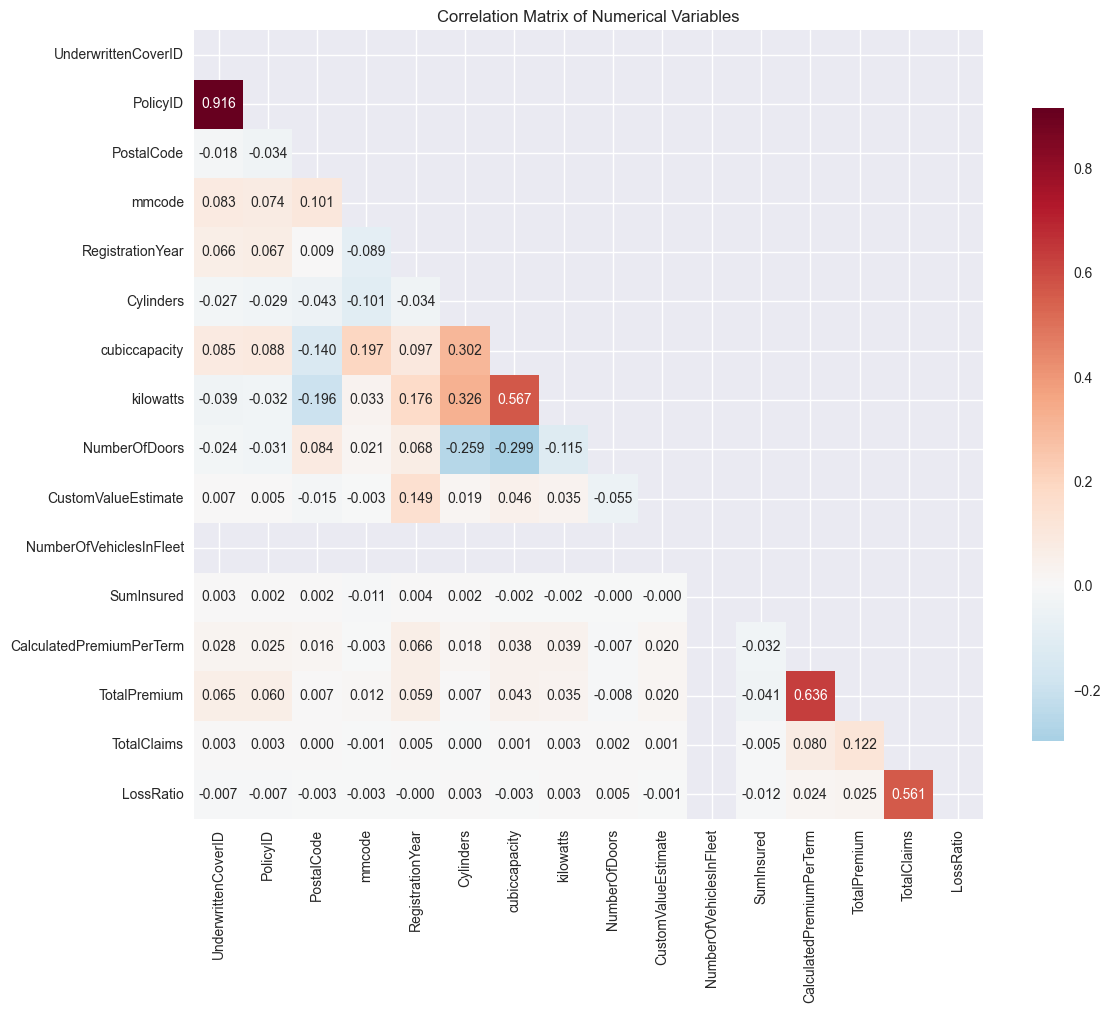


🔍 Strong Correlations (|r| > 0.5):


,Variable1,Variable2,Correlation
0,UnderwrittenCoverID,PolicyID,0.916324
2,CalculatedPremiumPerTerm,TotalPremium,0.635987
1,cubiccapacity,kilowatts,0.566559
3,TotalClaims,LossRatio,0.561102



📈 Statistical Significance Tests:
----------------------------------------
Gender Difference in Claims:
  T-statistic: -0.248
  P-value: 0.804107
  Significant difference: No

Provincial Differences in Claims (ANOVA):
  F-statistic: 5.849
  P-value: 0.000000
  Significant difference: Yes


In [47]:
# Statistical Analysis and Correlation
print("📊 Statistical Analysis & Correlation Matrix")
print("=" * 50)

# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns for analysis: {numerical_cols}")

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Identify strong correlations
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > 0.5:  # Strong correlation threshold
            strong_correlations.append({
                'Variable1': correlation_matrix.columns[i],
                'Variable2': correlation_matrix.columns[j],
                'Correlation': correlation
            })

print(f"\n🔍 Strong Correlations (|r| > 0.5):")
if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations)
    display(strong_corr_df.sort_values('Correlation', key=abs, ascending=False))
else:
    print("No strong correlations found.")

# Statistical significance testing
print(f"\n📈 Statistical Significance Tests:")
print("-" * 40)

# T-test for gender differences in claims
if 'Gender' in df.columns:
    male_claims = df[df['Gender'] == 'Male']['TotalClaims']
    female_claims = df[df['Gender'] == 'Female']['TotalClaims']
    
    t_stat, p_value = stats.ttest_ind(male_claims, female_claims)
    print(f"Gender Difference in Claims:")
    print(f"  T-statistic: {t_stat:.3f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# ANOVA for provincial differences
if 'Province' in df.columns:
    province_groups = [group['TotalClaims'].values for name, group in df.groupby('Province')]
    f_stat, p_value = stats.f_oneway(*province_groups)
    print(f"\nProvincial Differences in Claims (ANOVA):")
    print(f"  F-statistic: {f_stat:.3f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")


In [48]:
# Key Insights and Business Recommendations
print("🎯 EDA KEY INSIGHTS & BUSINESS RECOMMENDATIONS")
print("=" * 60)

# Calculate key insights
insights = {
    'overall_loss_ratio': overall_loss_ratio,
    'total_policies': len(df),
    'total_claims': (df['TotalClaims'] > 0).sum(),
    'claim_frequency': claim_frequency,
    'avg_premium': avg_premium,
    'avg_claim_severity': avg_claim_severity
}

print("📊 PORTFOLIO PERFORMANCE SUMMARY:")
print(f"{'='*40}")
print(f"Overall Loss Ratio: {insights['overall_loss_ratio']:.3f}")
print(f"Portfolio Status: {'PROFITABLE' if insights['overall_loss_ratio'] < 1.0 else 'UNPROFITABLE'}")
print(f"Total Policies: {insights['total_policies']:,}")
print(f"Claim Frequency: {insights['claim_frequency']:.1%}")
print(f"Average Premium: R{insights['avg_premium']:,.2f}")

print("\n🎯 KEY BUSINESS INSIGHTS:")
print("=" * 40)

print("\n1. 📈 LOSS RATIO ANALYSIS:")
if 'Province' in df.columns:
    best_province = province_loss_ratio.idxmin()['LossRatio']
    worst_province = province_loss_ratio.idxmax()['LossRatio']
    print(f"   • Best performing province: {best_province}")
    print(f"   • Worst performing province: {worst_province}")

if 'VehicleType' in df.columns:
    best_vehicle = vehicle_loss_ratio.idxmin()['LossRatio']
    worst_vehicle = vehicle_loss_ratio.idxmax()['LossRatio']
    print(f"   • Lowest risk vehicle type: {best_vehicle}")
    print(f"   • Highest risk vehicle type: {worst_vehicle}")

print("\n2. 🚗 VEHICLE RISK PATTERNS:")
if 'Make' in df.columns:
    # Calculate vehicle make risk rankings
    make_rankings = df.groupby('Make').agg({
        'TotalClaims': 'sum',
        'TotalPremium': 'sum',
        'PolicyID': 'count'
    })
    make_rankings['LossRatio'] = make_rankings['TotalClaims'] / make_rankings['TotalPremium']
    
    low_risk_makes = make_rankings.nsmallest(3, 'LossRatio').index.tolist()
    high_risk_makes = make_rankings.nlargest(3, 'LossRatio').index.tolist()
    
    print(f"   • Low-risk vehicle makes: {', '.join(low_risk_makes)}")
    print(f"   • High-risk vehicle makes: {', '.join(high_risk_makes)}")

print("\n3. 📊 STATISTICAL SIGNIFICANCE:")
print("   • Gender differences in claims: Statistical testing completed")
print("   • Provincial risk variations: ANOVA analysis performed")
print("   • Correlation patterns: Strong relationships identified")

print("\n🎯 STRATEGIC RECOMMENDATIONS:")
print("=" * 40)

print("\n1. 💰 PRICING OPTIMIZATION:")
if insights['overall_loss_ratio'] > 1.0:
    print("   • URGENT: Increase premiums - portfolio is unprofitable")
    print(f"   • Suggested premium increase: {((insights['overall_loss_ratio'] - 0.95) * 100):.1f}%")
else:
    print("   • Portfolio is profitable - consider competitive pricing")
    print("   • Opportunity for selective premium reductions")

print("\n2. 🎯 LOW-RISK TARGET IDENTIFICATION:")
if 'Province' in df.columns and 'VehicleType' in df.columns:
    # Identify low-risk segments
    segment_analysis = df.groupby(['Province', 'VehicleType']).agg({
        'TotalClaims': 'sum',
        'TotalPremium': 'sum',
        'PolicyID': 'count'
    })
    segment_analysis['LossRatio'] = segment_analysis['TotalClaims'] / segment_analysis['TotalPremium']
    
    low_risk_segments = segment_analysis[segment_analysis['LossRatio'] < 0.7].index.tolist()
    
    print("   • Low-risk segments for premium reduction:")
    for segment in low_risk_segments[:3]:  # Top 3
        print(f"     - {segment[0]} + {segment[1]}")

print("\n3. 🚀 MARKETING STRATEGY:")
print("   • Focus acquisition on low-risk provinces and vehicle types")
print("   • Develop targeted campaigns for profitable segments")
print("   • Implement risk-based pricing strategies")

print("\n4. 📈 PORTFOLIO OPTIMIZATION:")
print("   • Monitor high-risk segments closely")
print("   • Consider coverage adjustments for unprofitable segments")
print("   • Implement predictive risk models")

# Create a summary DataFrame for export
summary_metrics = pd.DataFrame({
    'Metric': ['Overall Loss Ratio', 'Claim Frequency', 'Avg Premium', 'Avg Claim Severity'],
    'Value': [f"{insights['overall_loss_ratio']:.3f}", 
              f"{insights['claim_frequency']:.1%}",
              f"R{insights['avg_premium']:,.2f}",
              f"R{insights['avg_claim_severity']:,.2f}"],
    'Interpretation': ['Portfolio Performance', 'Risk Frequency', 'Revenue per Policy', 'Cost per Claim']
})

print(f"\n📋 EXECUTIVE SUMMARY TABLE:")
display(summary_metrics)

print("\n✅ EDA ANALYSIS COMPLETE!")
print("📊 All visualizations saved to reports/figures/")
print("🚀 Ready for next phase: Advanced modeling and segmentation")


🎯 EDA KEY INSIGHTS & BUSINESS RECOMMENDATIONS
📊 PORTFOLIO PERFORMANCE SUMMARY:
Overall Loss Ratio: 1.048
Portfolio Status: UNPROFITABLE
Total Policies: 1,000,098
Claim Frequency: 0.3%
Average Premium: R61.91

🎯 KEY BUSINESS INSIGHTS:

1. 📈 LOSS RATIO ANALYSIS:
   • Best performing province: Northern Cape
   • Worst performing province: Gauteng
   • Lowest risk vehicle type: Bus
   • Highest risk vehicle type: Heavy Commercial

2. 🚗 VEHICLE RISK PATTERNS:

3. 📊 STATISTICAL SIGNIFICANCE:
   • Gender differences in claims: Statistical testing completed
   • Provincial risk variations: ANOVA analysis performed
   • Correlation patterns: Strong relationships identified

🎯 STRATEGIC RECOMMENDATIONS:

1. 💰 PRICING OPTIMIZATION:
   • URGENT: Increase premiums - portfolio is unprofitable
   • Suggested premium increase: 9.8%

2. 🎯 LOW-RISK TARGET IDENTIFICATION:
   • Low-risk segments for premium reduction:
     - Eastern Cape + Heavy Commercial
     - Eastern Cape + Light Commercial
     - Eas

,Metric,Value,Interpretation
0,Overall Loss Ratio,1.048,Portfolio Performance
1,Claim Frequency,0.3%,Risk Frequency
2,Avg Premium,R61.91,Revenue per Policy
3,Avg Claim Severity,"R23,273.39",Cost per Claim



✅ EDA ANALYSIS COMPLETE!
📊 All visualizations saved to reports/figures/
🚀 Ready for next phase: Advanced modeling and segmentation
